In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [8]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # get k'th subgroup in test, others in train
    x_te = x[k_indices[k,:]]
    y_te = y[k_indices[k,:]]
    x_tr = x[np.union1d(k_indices[:k,:], k_indices[k+1:,:])]
    y_tr = y[np.union1d(k_indices[:k,:], k_indices[k+1:,:])]

    # form data with polynomial degree
    phi_te = build_poly(x_te, degree)
    phi_tr = build_poly(x_tr, degree)
        
    # ridge regression
    w_tr = ridge_regression(y_tr, phi_tr, lambda_)
    
    # calculate the loss for train and test data
    rmse_tr = np.sqrt(2*compute_mse(y_tr, phi_tr, w_tr))
    rmse_te = np.sqrt(2*compute_mse(y_te, phi_te, w_tr))
    
    return rmse_tr, rmse_te
    raise NotImplementedError

In [9]:
seed = 1
degree = 7
k_fold = 4
k=2
lambda_ = 0.1

k_indices = build_k_indices(y, k_fold, seed)
a,b = cross_validation(y, x, k_indices, k, lambda_, degree)

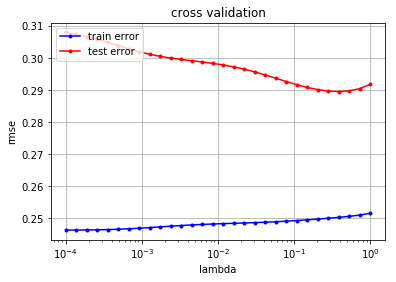

In [10]:
from plots import cross_validation_visualization

def cross_validation_demo():
    
    # define hyper-parameters
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
 
    for  lambda_ in lambdas:

        rmse_tr_all = []
        rmse_te_all = []
            
        for k in range(k_fold):        
        
            # compute losses for the k'th fold
            rmse_tr_tmp, rmse_te_tmp = cross_validation(y, x, k_indices, k, lambda_, degree)

            # store losses 
            rmse_tr_all.append(rmse_tr_tmp)
            rmse_te_all.append(rmse_te_tmp)
        
        # store mean losses
        rmse_tr.append(np.mean(rmse_tr_all))
        rmse_te.append(np.mean(rmse_te_all))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()